In [3]:
#UNSUPERVISED LEARNING - CLUSTERING - K-Means Clustering
# In Clustering there is no output(y) we train the model just bye the given inputs()
#DATASET = https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Mall_Customers.csv

In [4]:
#1 We are creating a dataframe of the given dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Mall_Customers.csv')
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [5]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
#Total number of data in dataframe
df.size

1000

In [8]:
#Input = Annual Income(k$)
#Input = Spending score (1-100) 

In [9]:
#Dividing the data into inputs
x = df.iloc[:,3:5].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

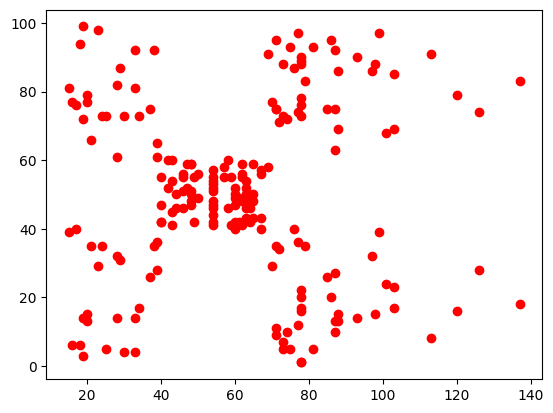

In [10]:
#Visualisation
import matplotlib.pyplot as plt
#plt.scatter(x-axis,y-axis)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], color = 'red')
#Here We have only one custer on the basis of the plot

In [11]:
#The number of clusters into which our data will be divided
import numpy as np
np.sqrt(200) #200 is total the number of points/rows
#k = No of Clusters
#k value should not exceed the square roots of the total number of rows/ points 

14.142135623730951

In [12]:
#Now We need to find out the number of clusters(k)
#There are 2 methods by which we can find the number of clusters: -
#1. ELBOW METHOD = Little Confusing
#2. SILHOUETTE SCORE METHOD = Very accurate

C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\subproce

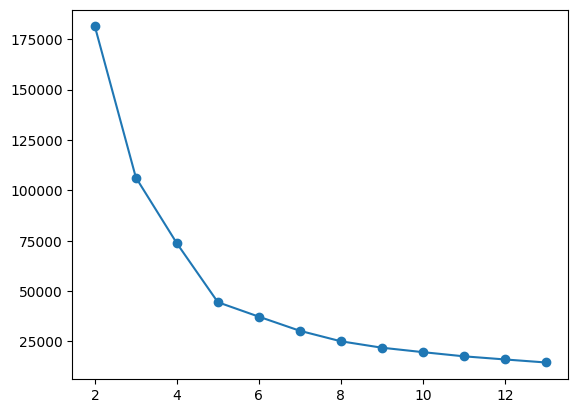

In [13]:
#1. ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,14) #Left = inclusive, Right = Exclusive

sse = [] #empty List

for i in k:
    demo_model = KMeans(n_clusters= i, random_state=0)
    demo_model.fit(x)
    sse.append(demo_model.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

In [ ]:
#Now Hers is the cath in the Elbow Method
#We will consider a point where the elbow is more prominent (Projecting from something)
#We can Assume as K = 5, But we are not exactly sure, so we are slightly confused in the elbow method.

In [ ]:
#IMPORTANT DATA
# Google Drive Link = tinyurl.com/teachnookds22

C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2 Cluster,Score  = 0.2968969162503008
3 Cluster,Score  = 0.46761358158775435
4 Cluster,Score  = 0.4931963109249047


C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 Cluster,Score  = 0.553931997444648
6 Cluster,Score  = 0.5379675585622219
7 Cluster,Score  = 0.5264283703685728


C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8 Cluster,Score  = 0.45544193969058644
9 Cluster,Score  = 0.4553729779390266
10 Cluster,Score  = 0.44760979994374317
11 Cluster,Score  = 0.4472950813160941


C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


12 Cluster,Score  = 0.4323888233160193
13 Cluster,Score  = 0.4309886380247191


C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14 Cluster,Score  = 0.4202217866258089


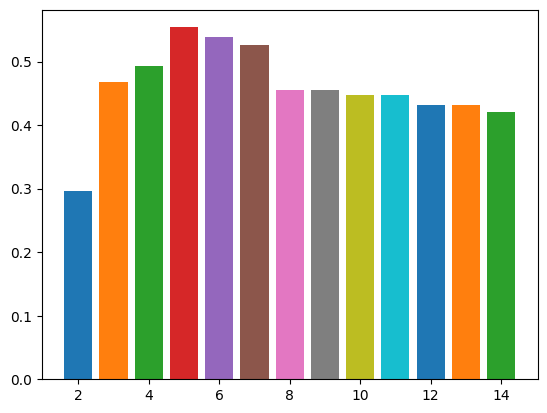

In [18]:
#2. SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,15)
for i in k :
    demo_model = KMeans(n_clusters= i ,random_state= 0)
    demo_model.fit(x)
    y_pred = demo_model.predict(x)
    print(f'{i} Cluster,Score  = {silhouette_score(x,y_pred)}')
    plt.bar(i,silhouette_score(x,y_pred))

In [ ]:
#CONCLUSION = K = 5 as it has the highest value among all the clusters

In [19]:
#Now To apply a clusterer
k = 5
from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, random_state= 0)
model.fit(x)

C:\Users\Dryunicorn\IdeaProjects\Python\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [24]:
#Let us predict the output
y = model.predict(x)
print(y) # Here the number 0,1,2,3,4 are the cluster numbers

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [25]:
#To check the size of putput values
y.size

200

In [28]:
x[y == 1,1]
#this means that the 1st number is the cluster number and the 2nd number is the column index number, 
#So when I select the cluster number and column index number, I get the value of inputs.

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83], dtype=int64)

In [29]:
x[y == 4,1]
# Here '4' means the cluster number and '1' the column index
# Here Cluster '4' is selected ad the column index '1' is selected, so I get the input value as 

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65], dtype=int64)

In [31]:
#To get the total number of values present in the given clusters
np.unique(y , return_counts=True)

(array([0, 1, 2, 3, 4]), array([81, 39, 35, 23, 22], dtype=int64))

In [32]:
35+81+39+23+22

200

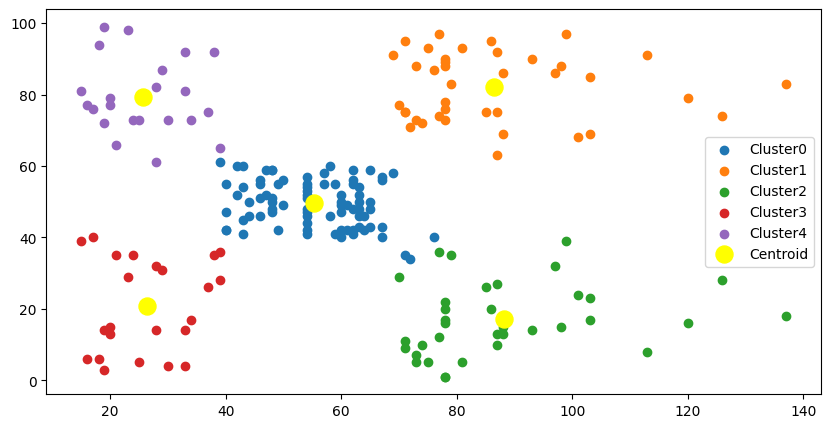

In [37]:
#Final Visualisation
#s= Size of Centroid
plt.figure(figsize=[10,5])

for i in range(k):
    plt.scatter(x[y == i,0],x[y == i,1], label =f'Cluster{i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 150 , color = 'yellow' , label = 'Centroid')
plt.legend()#Gives the labelling and naming